# 4. 데이터 탐색 이해와 실무

## 4.4 다변량 시각화

### 강의 교안
   1. 범주형-범주형 관계의 다변량 시각화
      - 모자이크플롯
      
   2. 범주형-연속형 관계의 다변량 시각화
      - 박스플롯
      - 평행좌표
   
   3. 연속형-연속형 관계의 다변량 시각화
      - 산점도
      
      
### 실습 내용 요약
   - 예쩨 데이터 기반의 다변량 시각화 방안에 대한 전반적 실습


### 실습데이터
   - 데이터 : Boston Housing Price
   
### 실습시 활용 패키지
   - pandas
   - numpy
   - matplotlib
   - seaborn
   - statsmodels

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 실습활용을 위한 sklearn 패키지내 보스턴 주택가격 데이터 로딩
# sklearn 상위버전(1.2)에서 데이터 셋을 더이상 제공하지 않음

# from sklearn.datasets import load_boston
# with warnings.catch_warnings():
#     warnings.filterwarnings('ignore')
#     data = load_boston()

# 상위버전 이용시 sklearn 참고 페이지 내 코드 실행하여 데이터 로딩
# data 및 target을 Dataframge으로 생성후 추후 marge

data_url = 'http://lib.stat.cmu.edu/datasets/boston'
raw_df = pd.read_csv(data_url, sep='\s+', skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2,:2]])
target = raw_df.values[1::2, 2] 

# 데이터 프레임 생성 및 Mearge
housing = pd.merge(pd.DataFrame(data), pd.DataFrame(target), left_index =True, right_index=True, how='inner')
housing.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### 데이터 컬럼 설명

#### 보스턴 인근 Town 별 주택 가격 밎 관련 정보 데이터셋

- CRIM :    per capita crime rate by town
- ZN :      proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS :   proportion of non-retail business acres per town
- CHAS :    Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX :     nitric oxides concentration (parts per 10 million)
- RM :      average number of rooms per dwelling
- AGE :     proportion of owner-occupied units built prior to 1940
- DIS :     weighted distances to five Boston employment centres
- RAD :     index of accessibility to radial highways
- TAX :     full-value property-tax rate per 10,000 dollar
- PTRATIO : pupil-teacher ratio by town
- B :       1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT :   persent lower status of the population
- MEDV :    Median value of owner-occupied homes in 1000 dollar's 

### 범주형-범주형 다변량 시각화
   - 모자이크플롯
      - 범주 별 조합 그룹 비교 시각화
      - 조합 간의 크기의 우위를 계략적으로 파악하는 것이 목적
      

In [3]:
# 데이터 copy
housing_data = housing.copy()

# 데이터 설명에 따라 CHAS 컬럼 범주형 데이터로 변환
housing_data = housing_data.astype({'CHAS':'object'})
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    object 
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(13), object(1)
memory usage: 55.5+ KB


In [4]:
# 실습을 위한 데이터 범주화 진행
# 4.3강 다변량 비시각화 실습 내용 참고

# 주택가격[MEDV] 범주화
medv_bins = [0,
            np.mean(housing_data['MEDV']),
            np.max(housing_data['MEDV'])]
medv_names = ['cheap', 'expensive']
housing_data['MEDV_G'] = pd.cut(housing_data['MEDV'], medv_bins, labels = medv_names)
housing_data

# INDUS 범주화
indus_bins = [0,
              np.mean(housing_data['INDUS']),
              np.max(housing_data['INDUS'])
]
indus_names = ['INDUS_LOW', 'INDUS_HIGH']
housing_data['INDUS_G'] = pd.cut(housing_data['INDUS'], indus_bins, labels = indus_names)
housing_data

# RAD 변수 범주화
rad_bins = [0,
            np.mean(housing_data['RAD']),
            np.max(housing_data['RAD'])
]
rad_names = ['RAD_LOW', 'RAD_HIGH']
housing_data['RAD_G'] = pd.cut(housing_data['RAD'], rad_bins, labels = rad_names)

housing_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,MEDV_G,INDUS_G,RAD_G
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,expensive,INDUS_LOW,RAD_LOW
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,cheap,INDUS_LOW,RAD_LOW
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,expensive,INDUS_LOW,RAD_LOW
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,expensive,INDUS_LOW,RAD_LOW
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,expensive,INDUS_LOW,RAD_LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,cheap,INDUS_HIGH,RAD_LOW
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,cheap,INDUS_HIGH,RAD_LOW
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,expensive,INDUS_HIGH,RAD_LOW
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,cheap,INDUS_HIGH,RAD_LOW


In [5]:
# 모자이크 플롯 시각화 패키지 로딩
from statsmodels.graphics.mosaicplot import mosaic

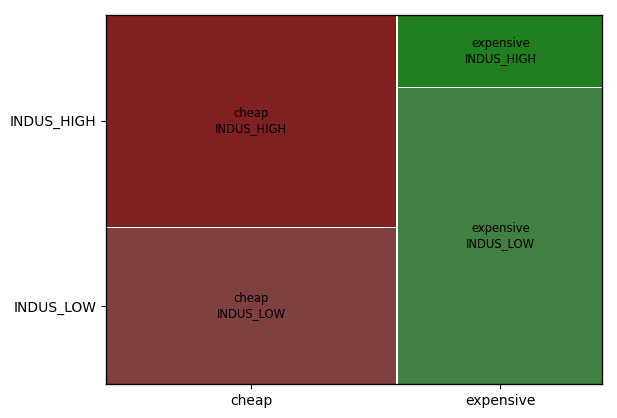

In [6]:
# 2개 범주 시각화
# 타겟 변수 주택가격, INDUS 범주간 모자이크 플롯
mosaic(housing_data,['MEDV_G', 'INDUS_G'])
plt.show()

   - cheap&INDUS_HIGH 조합을 지닌 데이터의 비중이 cheap&INDUS_LOW 조합을 지닌 비중보다 다소 많게 나타남
   - expensive&INDUS_HIGH 조합을 지닌 데이터의 비중이 expensive&INDUS_LOW 조합을 지닌 비중보다 적게 나타남
   
   - 즉, 주택 가격이 평균대비 낮은 지역들 중 (cheap 범주) 상업지구 비중이 적은 지역의 비중이 다소 많아 보임
   - 이와 반대로, 주택 가격이 평균대비 높은 지역 중 (expensive 범주) 상업지구 비중이 많은 지역의 비중이 크게 많아 보임

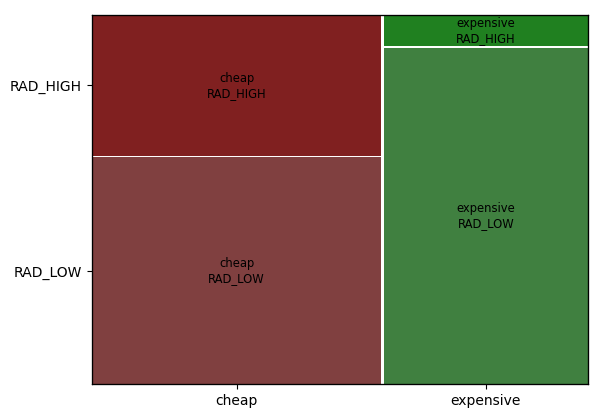

In [7]:
# 타겟변수 주택가격 범주와 고속도로 접근성 지수 비중 범주간 모자이크 플롯
mosaic(housing_data,['MEDV_G', 'RAD_G'])
plt.show()

   - cheap&RAD_HIGH 조합을 지닌 데이터의 비중이 cheap&RAD_LOW 조합을 지닌 비중보다 적게 나타남
   - expensive&RAD_HIGH 조합을 지닌 데이터의 비중이 expensive&RAD_LOW 조합ㅇ르 지닌 비중보다 적게 나타남
   
   
   - 즉, 가격이 평균대비 낮은 지역에서 고속도로 접근성 지수가 떨어지는 지역의 비중이 다소 많음
   - 또한 가격이 평균 대비 높은 지역에서 고속도로 접근성 지수가 떨어지는 지역의 비중이 크게 많아보임

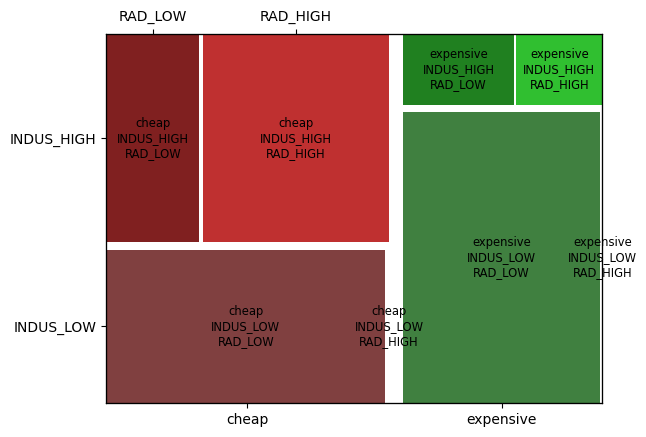

In [8]:
# 3개 범주 시각화
# 타겟변수 주택가격 범주와 비상업지구 정도 고속도로 접근성 정도 범주간 모자이크 플롯

mosaic(housing_data, ['MEDV_G', 'INDUS_G', 'RAD_G'], gap = 0.03)
plt.show()

   - 가격이 평균대비 높은 지역 중(expensive), 상업지구 비중이 많고(INDUS_LOW), 고속도로 접근성이 떨어진 경우의 비중이 두드러지게 나타남을 확인
   - 이처럼 범주 별 조합 간의 비중을 수치가 아닌 모자이크플롯 기반의 시각화로 표현하여 개략적인 데이터 구성 확인 가능

### 범주형-연속형 다변량 시각화
   - 박스플롯
   - 평행좌표
      - 범주 별 요약통계량 및 경향성을 계략적으로 파악을 위한 시각화

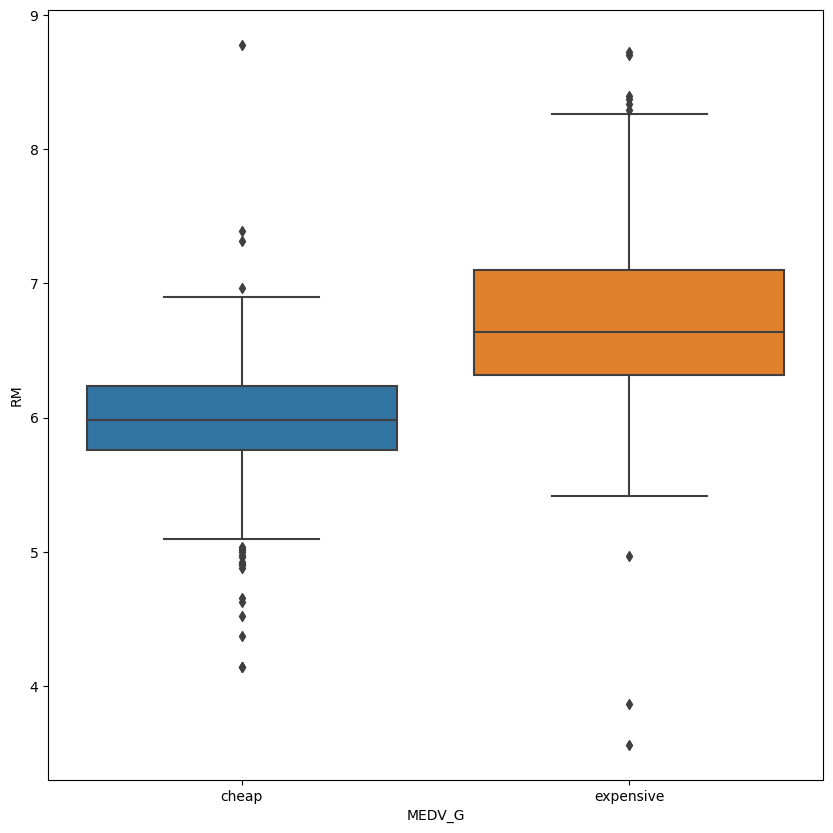

In [9]:
# Box plot 시각화
# 주택 가격 범주 별 평균 방의 개수 요약 통계량 도출
plt.figure(figsize = (10,10))
sns.boxplot(data = housing_data, x='MEDV_G', y='RM')
plt.show()

   - 주택가격이 평군대비 낮은 지역들의 방의 개수는 주태가격 평균대비 높은 지역들보다 중앙 값을 비롯하여 전반적으로 낮음

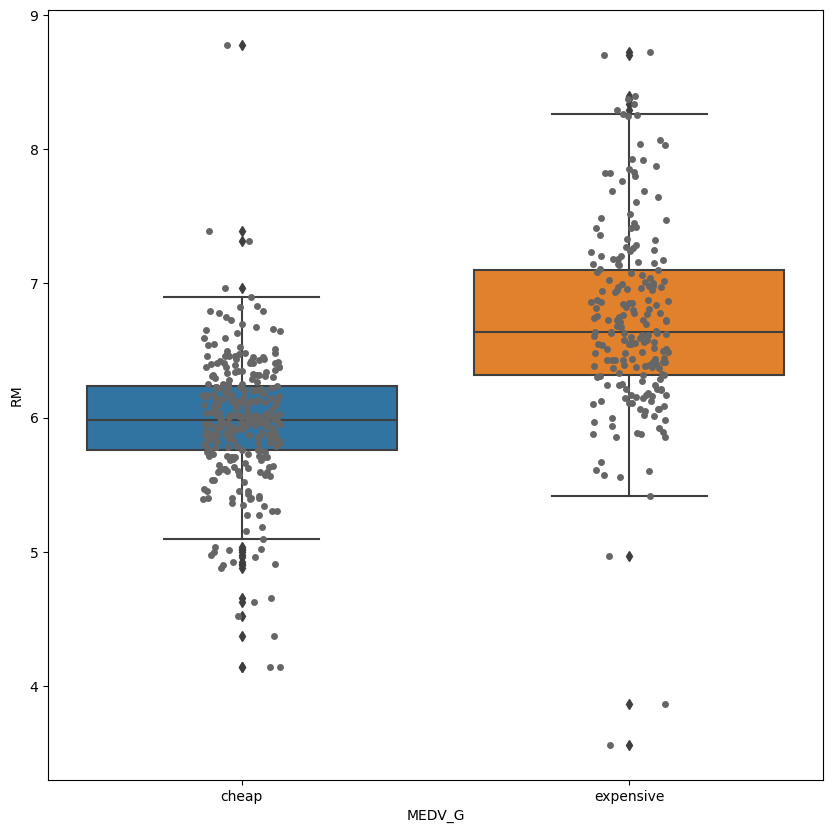

In [10]:
# Box plot 시각화
# 데이터 관측치 별 위치 point 추가
plt.figure(figsize = (10,10))
sns.boxplot(data = housing_data, x='MEDV_G', y='RM')
sns.stripplot(data=housing_data, x='MEDV_G', y='RM', color='0.4')
plt.show()

   - 각 관측치 위치를 점으로 함꼐 표현하여 데이터 분포 파악
   - 주택가격이 평균대비 낮은 지역의 평균 방 개수는 약 6의 중앙값, 가격이 평균대비 높은 지역의 방이 개수는 약 6.5에 가까움
   - 즉, 주택가격이 평균대비 낮은 지역보다 높은 지역들의 방의 개수가 많음을 확인

In [11]:
# 평행좌표 실습을 패키지 로딩
from pandas.plotting import parallel_coordinates

##### 변수 간략 의미 정리
1. CRIM : 범죄율
2. AGE : 주택연식
3. INDUS : 상업지역 비중
4. RAD : 고속도로 접근성
5. RM : 평균 방의 개수

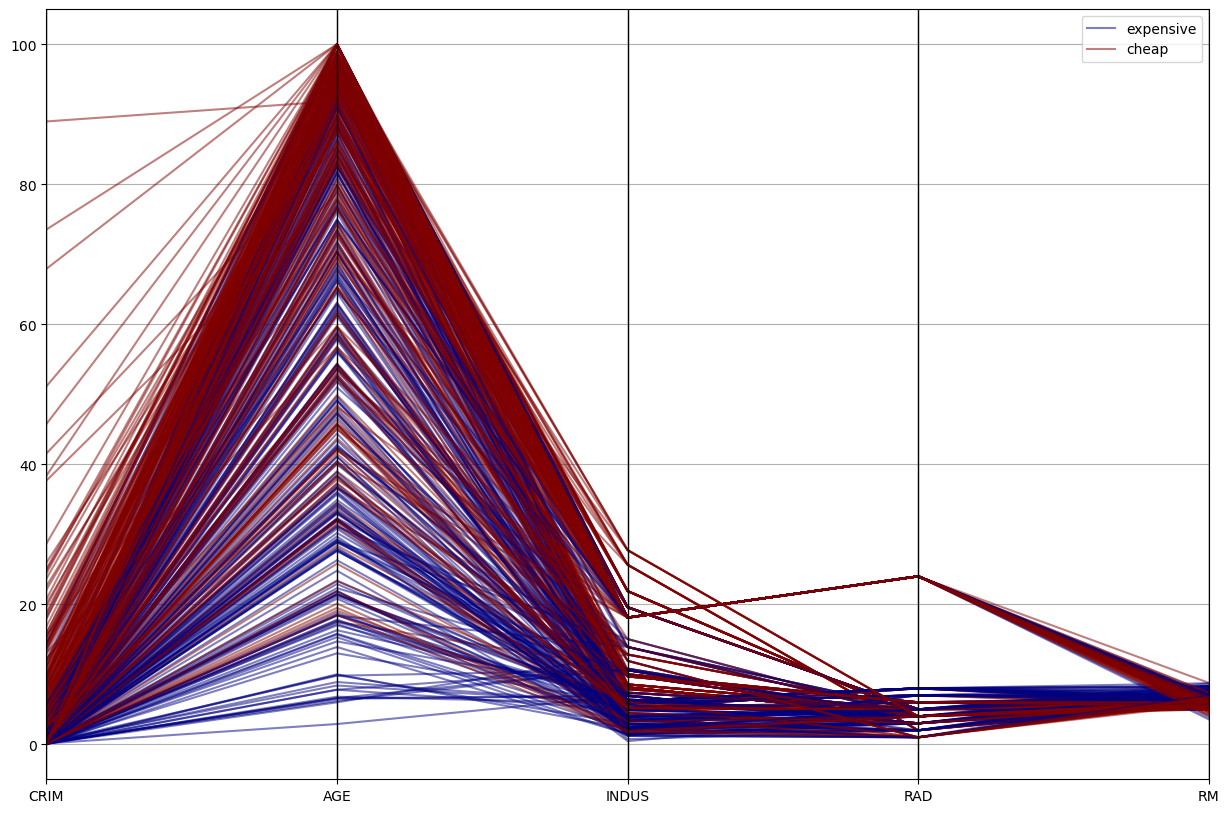

In [12]:
# 데이터 일부 선택
sub_data = housing_data[['CRIM', 'AGE', 'INDUS', 'RAD', 'RM', 'MEDV_G']]
# 평행좌표 실습
plt.figure(figsize=(15,10))
parallel_coordinates(sub_data, 'MEDV_G', colormap= plt.get_cmap('jet'), alpha = 0.5)
plt.show()

   - 주택 평균 가격이 낮은 경우의 경향 요약(자주색)
      - 범죄율 높음(CRIM)
      - 오래된 연식의 주택이 많음(AGE)
      - 방의 개수가 적음(RM)
   
   - 컬럼 별 범위가 서로 다르기 때문에, 범위를 조정하여 주택가격이 높고 낮은 범주별 차이를 명확하게 파악

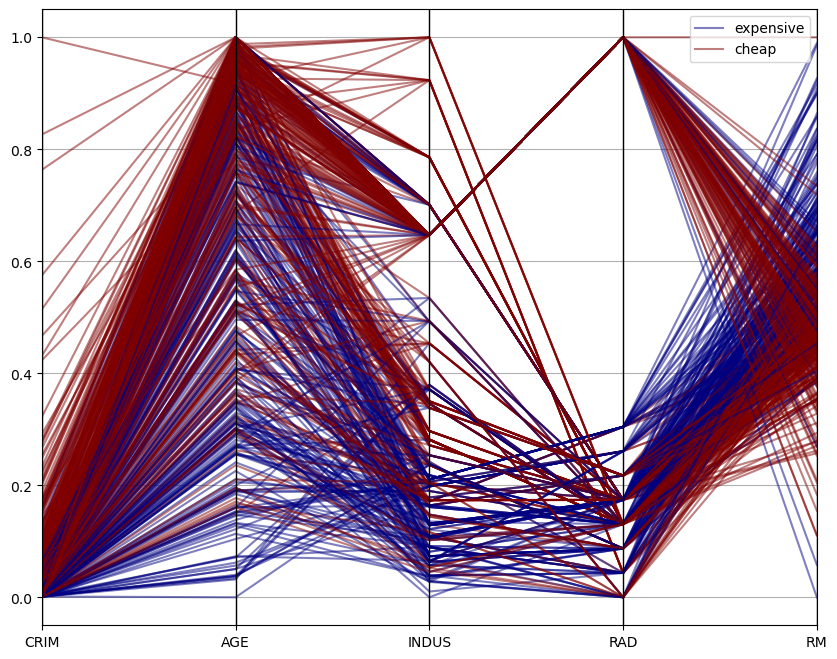

In [13]:
# 데이터의 값의 위치를 파악할 수 있는 Min-Max Scaling 변환

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_df = sub_data[['CRIM', 'AGE', 'INDUS', 'RAD', 'RM']]
x_norm = pd.DataFrame(scaler.fit_transform(x_df), columns = ['CRIM', 'AGE', 'INDUS', 'RAD', 'RM'])

sub_data_scale = pd.merge(x_norm, sub_data[['MEDV_G']], left_index=True, right_index=True, how='inner')

# scaling한 데이터로 평행좌표 실습
plt.figure(figsize=(10,8))
parallel_coordinates(sub_data_scale, 'MEDV_G', colormap= plt.get_cmap('jet'), alpha=0.5)
plt.show()

   - 주택 평균 가격이 낮은 경우의 경향 요약 (자주색)
      1) 범죄율이 높은 경향
      2) 오래된 연식의 주택의 비율이 Town 내에 많음
      3) 상업지역의 비중이 비교적 적음
      4) 고속도로 접근성 지수가 비교적 높음
      5) 방의 개수가 적음
   - 이처럼 타겟 변수의 범주 별 데이터 경향성 파악은 평행좌표 시각화를 통해 파악 가능

### 연속형-연속형 다변량 시각화

   - 산점도
      - 연속형 변수 간 관계를 계략적으로 파악하기 위한 시각화
      - 변수 간 선형성 및 양과 음의 관계성 등을 파악 가능

In [14]:
# 데이터 copy
housing_data = housing.copy()
# 데이터설명에 따라 chas 컬럼을 범주형 데이터로 전환
housing_data = housing_data.astype({'CHAS':'object'})

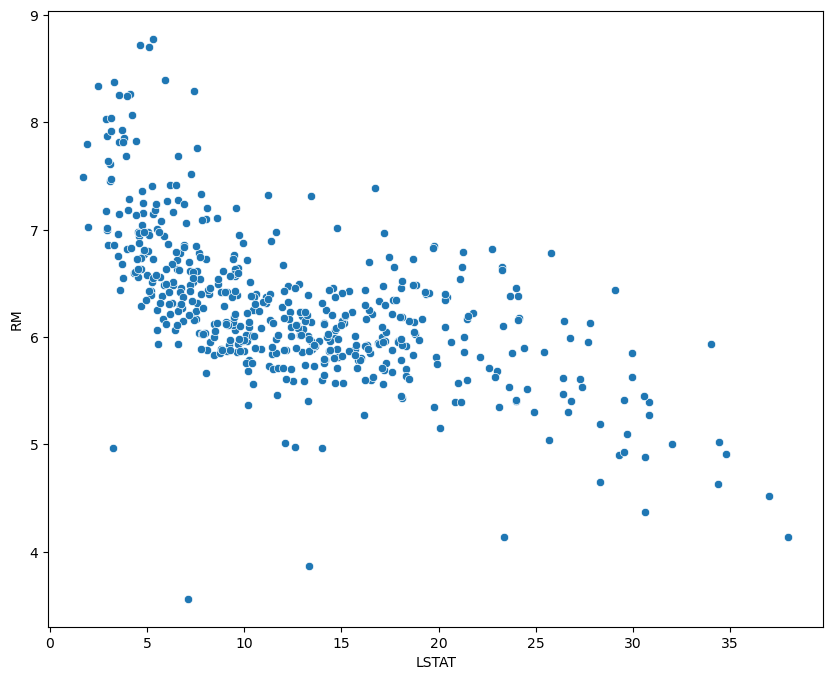

In [15]:
# 하위 계층 비율과 평균 방의 개수간 상관관계 확인
plt.figure(figsize=(10,8))
sns.scatterplot(x='LSTAT', y='RM', data = housing_data)
plt.show()

In [16]:
# 상관계수 확인
import scipy.stats as stats
stats.pearsonr(housing_data.LSTAT, housing_data.RM) #(상관계수, P value)

(-0.6138082718663957, 1.0330091329655203e-53)

   - 방의 개수가 적을수록, 하위 계층의 비율이 높은 음의 상관관계를 보임
   - 약간의 선형관계성을 보이며, 일부 잠재적 이상치가 존재함

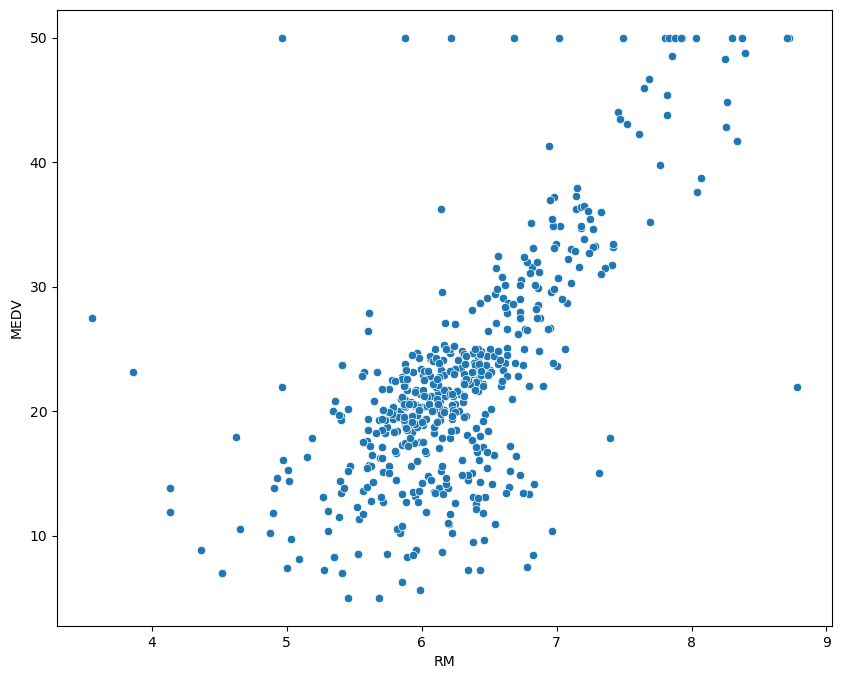

In [17]:
# 평균 방의 개수 및 주택 가격 간 상관관계확인
plt.figure(figsize=(10,8))
sns.scatterplot(x='RM', y='MEDV', data= housing_data)
plt.show()

In [18]:
# 상관계수 확인
stats.pearsonr(housing_data.RM, housing_data.MEDV) #(상관계쑤, P value)

(0.6953599470715393, 2.487228871007442e-74)

### 다양한 상관관계의 정도를 시각화하는 방안 : Heatmap

   - 본래 Heatmap은 범주형 자료의 범주 별로 연속형 자료를 집계한 자료를 사용하며 (혹은 2개 범주형 변수 조합 별 빈도 집계), 집계한 값에 비례항 색깔을 다르게 해서 2차원으로 자료를 시각화하는 영역에 활용
   
   - 연속형 자료이나, 테이블 내 많은 조합 간 상관관계의 강도 및 정도의 강약을 Heatmap으로 시각화하여 쉽게 파악 가능
      - 컬럼 별 조합 : 범주 별 조합
      - 컬럼 별 상관계수 : 범주 별 강도(빈도와 유사한 수치적 표현)

In [19]:
# 모든 컬럼 간 상관관계 도출
# 4.3강 다변량 비시각화 교안 참고
np.round(housing_data.corr(),2)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
NOX,0.42,-0.52,0.76,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47
PTRATIO,0.29,-0.39,0.38,0.19,-0.36,0.26,-0.23,0.46,0.46,1.00,-0.18,0.37,-0.51


   - 변수가 13개인 경우 13X13인, 총 169개의 cell 값 도출
   - 변수가 많아질 경우, 모든 컬럼 간 상관관계를 한눈에 파악하기 쉽지 않음
   - 이러한 상황의 대안의 시각화 방안 존재
      - 히트맵 : 다변량 데이터를 활용하여 행과 열 그리고 색상을 활용하여 테이블을 구성하여 특정 용역의 패턴 전체적으로 시각화

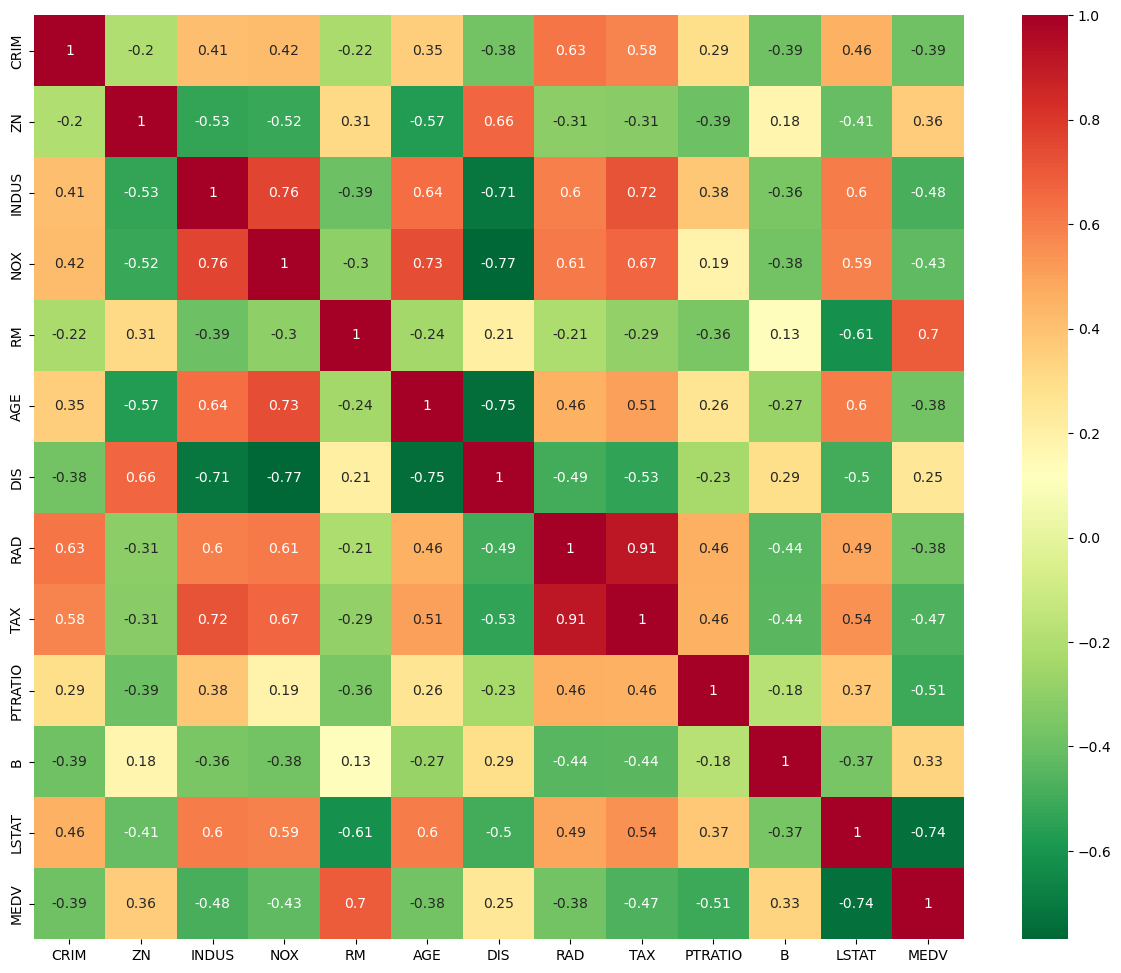

In [20]:
# 상관계수 데이터프레임을 Heatmap으로 시각화
plt.figure(figsize=(15,12))
sns.heatmap(housing_data.corr(), annot=True, cmap='RdYlGn_r')
plt.show()

   - 빨간색 혹은 초록색으로 짙어지는 경우 양/음의 방향으로 상관관계가 높음을 확인
   - 색상에 따라 비교적 빠르게 데이터 개별 컬럼간 밀접함을 개략적으로 파악 가능

In [25]:
# 범주별 빈도를 eatmap 시각화를 위해 샘플테이블 생성
sample_data ={
    'city' : ['seoul', 'seoul', 'seoul', 'newyork', 'newyork', 'newyork', 'london', 'london', 'london'],
    'year' : ['2020', '2021', '2022', '2020', '2021', '2022', '2020', '2021', '2022'],
    'visitor' : [998712, 873164, 124502, 3376442, 2478621, 874510, 2129451, 1878551, 688781]
}
columns = ['city', 'year', 'visitor']
sample_df = pd.DataFrame(sample_data, columns = columns)
sample_df

,city,year,visitor
0,seoul,2020,998712
1,seoul,2021,873164
2,seoul,2022,124502
3,newyork,2020,3376442
4,newyork,2021,2478621
5,newyork,2022,874510
6,london,2020,2129451
7,london,2021,1878551
8,london,2022,688781


In [26]:
# 데이터 pivot
pivot_df = sample_df.pivot('city','year', 'visitor')
pivot_df

year,2020,2021,2022
city,,,
london,2129451,1878551,688781
newyork,3376442,2478621,874510
seoul,998712,873164,124502


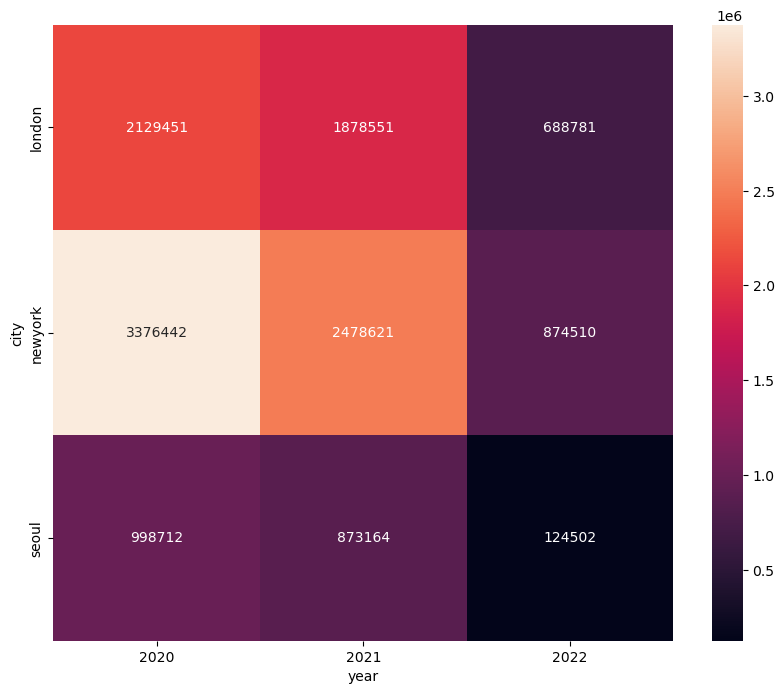

In [27]:
# pivot 데이블을 Heatmap으로 시각화
plt.figure(figsize=(10,8))
sns.heatmap(pivot_df,
            annot=True, ## 빈도수 
            fmt='d' ## 빈도의 점수 표현
           )
plt.show()

   - 범주 별 연속형 변수의 수치를 히트맴으로 표현하여 각 셀(Cell)의 강도를 색상으로 표현하기 위한 차이를 파악하기 쉽게 함